# Coco Datasets Exploration for Object Detection


In this example, we show how we can explore the data in Coco datasets. 
- summary of the dataset
- visualize a single image with objects in bounding box
- visualize a single image with objects as segmentation pixels 

In [1]:
from my_lib.data.coco.coco_dataset import CocoDataset, CocoPathManager,CocoSampleAnnotationJSONGenerator
from my_lib.visualization.image_vis import show_single_image



In [ ]:
coco_path_manager = CocoPathManager()
data_set_obj = CocoDataset(coco_path_manager, "train")

# 1. Summary

In [11]:
import pandas as pd

In [12]:
info = data_set_obj.dataset_summary()


In [13]:
for k, v in info.items():
    if isinstance(v, int):
        info[k] = [v]
dataframe = pd.DataFrame.from_dict(info, orient='index')

In [14]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
class,dog,baseball glove,baseball bat,sheep,cat,spoon,fork,bear,mouse,remote,...,wine glass,zebra,cup,toilet,hair drier,airplane,train,vase,horse,toaster
class_number,80,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
superclass,accessory,outdoor,indoor,animal,food,furniture,person,vehicle,kitchen,sports,...,None,None,None,None,None,None,None,None,None,None
superclass_number,12,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
image_number,118287,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# 2. Singe image

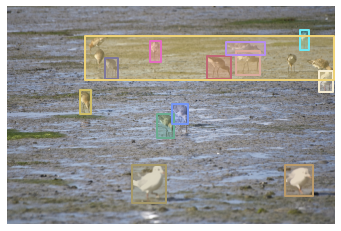

in rois, we have the following classes
['bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird']


In [15]:
for index in [400]:  # 100, 400
    img, annot = data_set_obj[index]
    box_dict = {}
    box_dict['box'] = annot['box_list']
    show_single_image(img, **box_dict)
    category_id_list = annot["category_id_list"].tolist()
    cat_list = data_set_obj.obtain_categories(category_id_list)
    print('in rois, we have the following classes')
    print(cat_list)
    

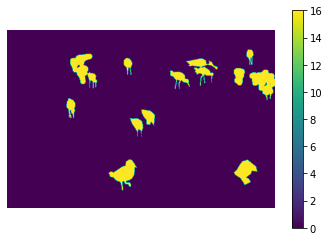

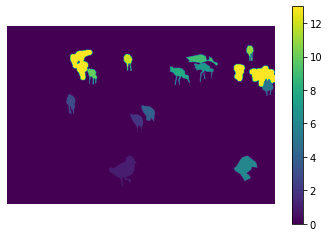

In [16]:
index = 400
mask = data_set_obj.get_segmentation_mask(index)
show_single_image(mask, **{'cmap':'viridis'})
mask = data_set_obj.get_segmentation_mask(index, b_instance=True)
show_single_image(mask, **{'cmap':'viridis'})

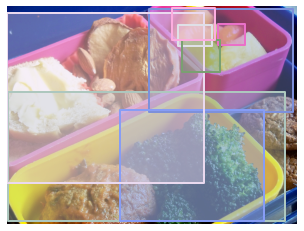

in rois, we have the following classes
['bowl', 'bowl', 'broccoli', 'bowl', 'orange', 'orange', 'orange', 'orange']


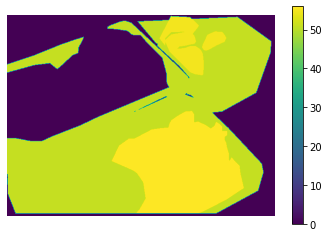

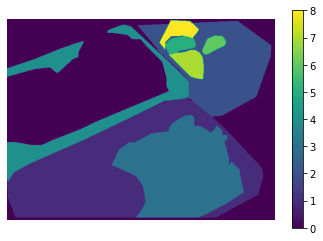

In [17]:
for index in [0]:  # 100, 400
    img, annot = data_set_obj[index]
    box_dict = {}
    box_dict['box'] = annot['box_list']
    show_single_image(img, **box_dict)
    category_id_list = annot["category_id_list"].tolist()
    cat_list = data_set_obj.obtain_categories(category_id_list)
    print('in rois, we have the following classes')
    print(cat_list)
mask = data_set_obj.get_segmentation_mask(index)
show_single_image(mask, **{'cmap':'viridis'})
mask = data_set_obj.get_segmentation_mask(index, b_instance=True)
show_single_image(mask, **{'cmap':'viridis'})

# 3. Generate a sample COCO data set 

In [3]:


coco_path_manager = CocoPathManager()
sample_generator = CocoSampleAnnotationJSONGenerator(coco_path_manager, "val")
sample_generator.generate_sample_json_file()
sample_generator = CocoSampleAnnotationJSONGenerator(coco_path_manager, "train")
sample_generator.generate_sample_json_file()
    

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
/home/jianglin/workspace/sk/education/modified_centernet/CenterNet/data/coco/annotations/instances_sampleval2017.json
loading annotations into memory...
Done (t=10.37s)
creating index...
index created!
/home/jianglin/workspace/sk/education/modified_centernet/CenterNet/data/coco/annotations/instances_sampletrain2017.json


In [4]:
coco_path_manager = CocoPathManager()
data_set_obj = CocoDataset(coco_path_manager, "sampletrain")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


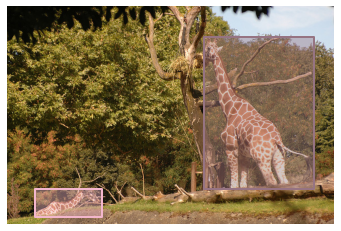

in rois, we have the following classes
['giraffe', 'giraffe']


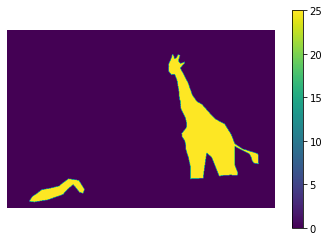

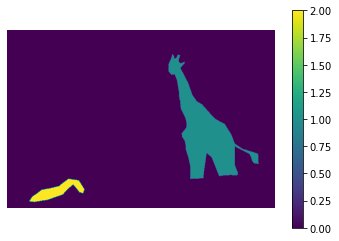

In [7]:
for index in [1]:  # 100, 400
    img, annot = data_set_obj[index]
    box_dict = {}
    box_dict['box'] = annot['box_list']
    show_single_image(img, **box_dict)
    category_id_list = annot["category_id_list"].tolist()
    cat_list = data_set_obj.obtain_categories(category_id_list)
    print('in rois, we have the following classes')
    print(cat_list)
mask = data_set_obj.get_segmentation_mask(1)
show_single_image(mask, **{'cmap':'viridis'})
mask = data_set_obj.get_segmentation_mask(index, b_instance=True)
show_single_image(mask, **{'cmap':'viridis'})